In [88]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os
import torch

def get_wrapped_num(num, width):
    remainder = num % (2 * width)
    return remainder if remainder < width else 2 * width - remainder - 1 

def angle_to_ratio(angle):
    rad = angle * np.pi / 180
    x = int(np.sin(rad) * 100)
    y = int(np.cos(rad) * 100)
    return x, y 

def reconstruct_3D(data):
    indices = np.argwhere(data > 0)
    values = data[data > 0]
    data_output = np.column_stack((indices, values))
    return data_output

def plot_3d(file):
    file3d = reconstruct_3D(file)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(file3d[:, 0], file3d[:, 1], file3d[:, 2], s=2, alpha=1)
    plt.show()

def generate_rdt_data_tensors(num_of_files, angle, up, sideways, x_dim, y_dim, t_dim, show=False, origin=None):
    file = torch.zeros((num_of_files, 1, y_dim, x_dim), dtype=torch.float64)

    if origin is None:
        # genrate random integers in shape (num_of_files, 1)
        x_origins = torch.randint(0, x_dim, (num_of_files, 1), dtype=torch.int32)
        y_origins = torch.randint(0, y_dim, (num_of_files, 1), dtype=torch.int32)
        t_origins = torch.randint(0, t_dim, (num_of_files, 1), dtype=torch.float64)
    else:
        # fill with the user input origin
        x_origins = torch.full((num_of_files, 1), origin[0], dtype=torch.int32)
        y_origins = torch.full((num_of_files, 1), origin[1], dtype=torch.int32)
        t_origins = torch.full((num_of_files, 1), origin[2], dtype=torch.float64)

    for idx, (origin_x, origin_y, origin_t) in enumerate(zip(x_origins, y_origins, t_origins)):
        file[idx, 0, origin_y, origin_x] = origin_t

        nudge_x, nudge_y, i, t_pos = 0, 0, 0, origin_t
        y_pos = origin_y

        while y_pos > 0 and t_pos < t_dim - 1:
            i += 1
            if i % up == 0:
                nudge_x += 1
            if i % sideways == 0:
                nudge_y += 1

            if i % max(up, sideways) == 0:
                y_pos = origin_y - nudge_y
                t_pos += 1
                x1 = get_wrapped_num(origin_x - nudge_x, x_dim)
                x2 = get_wrapped_num(origin_x + nudge_x, x_dim)
                file[idx, 0, y_pos, x1] = t_pos
                file[idx, 0, y_pos, x2] = t_pos

        if show:
            plt.imshow(file[1][0])
            plt.show()
            #plot_3d(file[0][0])

    return file


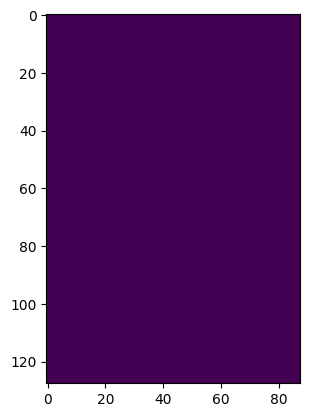

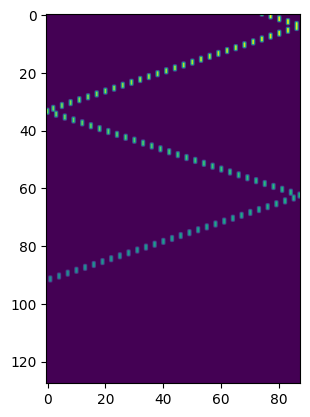

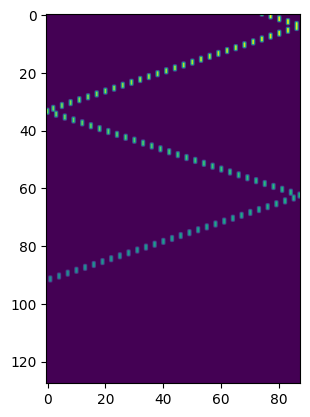

torch.Size([3, 1, 128, 88])


In [90]:
#%% Inputs
x_dim = 88
y_dim = 128
t_dim = 1000
save_path = r"N:\Yr 3 Project Datasets\RDT_200K\Data\\"
angle = 45 
num_of_files = 3
origin = None    #Set to none to have random origins, or input coordinates (x,y, ToF)
show = True

up =  random.randint(1,1) #1
sideways =  random.randint(3, 3) #1
file_fin = generate_rdt_data_tensors(num_of_files, angle, up, sideways, x_dim, y_dim, t_dim, show, origin)
print(file_fin.shape)


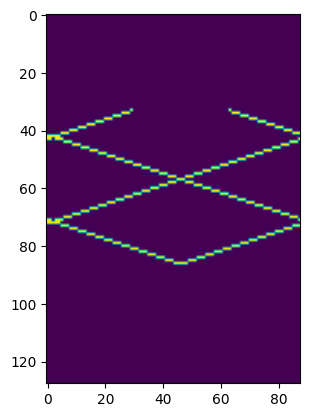

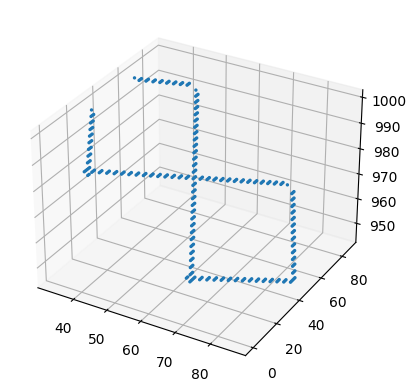

tensor([3, 1, 0, 4, 5, 2])
tensor([3])
tensor([1, 0])
tensor([], dtype=torch.int64)
tensor([4, 5, 2])
torch.Size([6, 1, 128, 88])


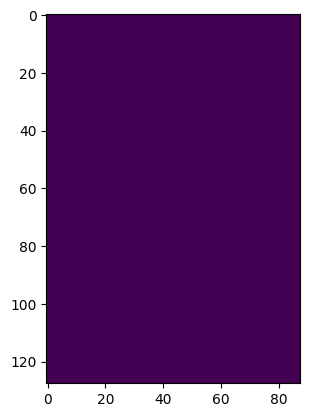

tensor([[[[5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.],
          ...,
          [5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.]]],


        [[[5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.],
          ...,
          [5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.],
          [5., 5., 5.,  ..., 5., 5., 5.]]],


        [[[3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          ...,
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
    